In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
with open('../../data/pract_dataset.pkl', 'rb') as f:
    df = pickle.load(f)

In [3]:
df.head()

,Вектор Мощи,Скорость перехода через портал,Приток Силы Потока,Ритм магического ядра,Поток Энергий,Сила Левого Потока,Сила Правого Потока,Пламя Стихий,Температура вдоха Истока,Приток давления Выдоха Истока,Давление выдоха Истока,Печать Чародея,Эмульсия Истока,Дыхание Истока,Тип Вектора Мощи,Гармония Бессмертия
0,1.138,1.54332,289.964,141.318158,6677.380,7.584,7.584,464.006,736,1.096,5.947,7.137,0.082,0.95,1,0.975
1,2.088,NaN,6960.180,144.111767,6828.469,28.204,28.204,635.401,736,1.331,7.282,10.655,0.287,0.95,1,0.975
2,3.144,4.62996,8379.229,145.220853,7111.811,60.358,60.358,606.002,736,1.389,7.574,13.086,0.259,0.95,2,0.975
3,4.161,6.17328,14724.395,162.050156,7792.630,113.774,113.774,661.471,736,1.658,9.007,18.109,0.358,0.95,2,0.975
4,5.140,7.71660,21636.432,201.513586,8494.777,175.306,175.306,731.494,736,2.078,11.197,26.373,0.522,0.95,3,0.975


In [4]:
X = df.drop(columns=['Гармония Бессмертия'], axis=1)
y = df['Гармония Бессмертия']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Заполенение пропущенных значений

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11934 entries, 0 to 11933
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Вектор Мощи                     11934 non-null  float64
 1   Скорость перехода через портал  10731 non-null  float64
 2   Приток Силы Потока              11934 non-null  float64
 3   Ритм магического ядра           11934 non-null  float64
 4   Поток Энергий                   11934 non-null  float64
 5   Сила Левого Потока              11934 non-null  float64
 6   Сила Правого Потока             11934 non-null  float64
 7   Пламя Стихий                    11934 non-null  float64
 8   Температура вдоха Истока        11934 non-null  int64  
 9   Приток давления Выдоха Истока   11934 non-null  float64
 10  Давление выдоха Истока          11934 non-null  float64
 11  Печать Чародея                  11934 non-null  float64
 12  Эмульсия Истока                 

Требуется заполнить только столбец "Скорость перехода через портал"

# Статистические методы

## Заполним медианой

In [7]:
median = X_train['Скорость перехода через портал'].median()
df_median = df.copy()
df_median['Скорость перехода через портал'] = df['Скорость перехода через портал'].fillna(median)

In [8]:
df_median.head()

,Вектор Мощи,Скорость перехода через портал,Приток Силы Потока,Ритм магического ядра,Поток Энергий,Сила Левого Потока,Сила Правого Потока,Пламя Стихий,Температура вдоха Истока,Приток давления Выдоха Истока,Давление выдоха Истока,Печать Чародея,Эмульсия Истока,Дыхание Истока,Тип Вектора Мощи,Гармония Бессмертия
0,1.138,1.54332,289.964,141.318158,6677.380,7.584,7.584,464.006,736,1.096,5.947,7.137,0.082,0.95,1,0.975
1,2.088,7.71660,6960.180,144.111767,6828.469,28.204,28.204,635.401,736,1.331,7.282,10.655,0.287,0.95,1,0.975
2,3.144,4.62996,8379.229,145.220853,7111.811,60.358,60.358,606.002,736,1.389,7.574,13.086,0.259,0.95,2,0.975
3,4.161,6.17328,14724.395,162.050156,7792.630,113.774,113.774,661.471,736,1.658,9.007,18.109,0.358,0.95,2,0.975
4,5.140,7.71660,21636.432,201.513586,8494.777,175.306,175.306,731.494,736,2.078,11.197,26.373,0.522,0.95,3,0.975


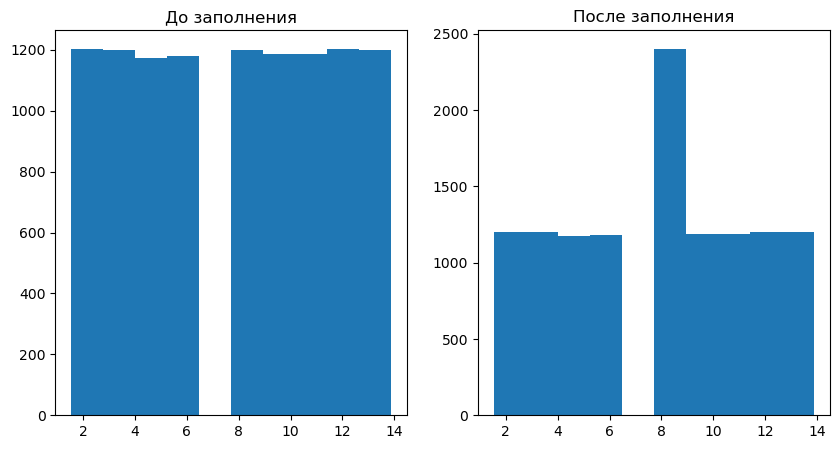

In [9]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
ax[0].hist(df['Скорость перехода через портал'])
ax[0].set_title('До заполнения')
ax[1].hist(df_median['Скорость перехода через портал'])
ax[1].set_title('После заполнения')
plt.show()

## Заполним средним

In [10]:
mean = X_train['Скорость перехода через портал'].mean()
df_mean = df.copy()
df_mean['Скорость перехода через портал'] = df['Скорость перехода через портал'].fillna(mean)

In [11]:
df_mean.head()

,Вектор Мощи,Скорость перехода через портал,Приток Силы Потока,Ритм магического ядра,Поток Энергий,Сила Левого Потока,Сила Правого Потока,Пламя Стихий,Температура вдоха Истока,Приток давления Выдоха Истока,Давление выдоха Истока,Печать Чародея,Эмульсия Истока,Дыхание Истока,Тип Вектора Мощи,Гармония Бессмертия
0,1.138,1.543320,289.964,141.318158,6677.380,7.584,7.584,464.006,736,1.096,5.947,7.137,0.082,0.95,1,0.975
1,2.088,7.725235,6960.180,144.111767,6828.469,28.204,28.204,635.401,736,1.331,7.282,10.655,0.287,0.95,1,0.975
2,3.144,4.629960,8379.229,145.220853,7111.811,60.358,60.358,606.002,736,1.389,7.574,13.086,0.259,0.95,2,0.975
3,4.161,6.173280,14724.395,162.050156,7792.630,113.774,113.774,661.471,736,1.658,9.007,18.109,0.358,0.95,2,0.975
4,5.140,7.716600,21636.432,201.513586,8494.777,175.306,175.306,731.494,736,2.078,11.197,26.373,0.522,0.95,3,0.975


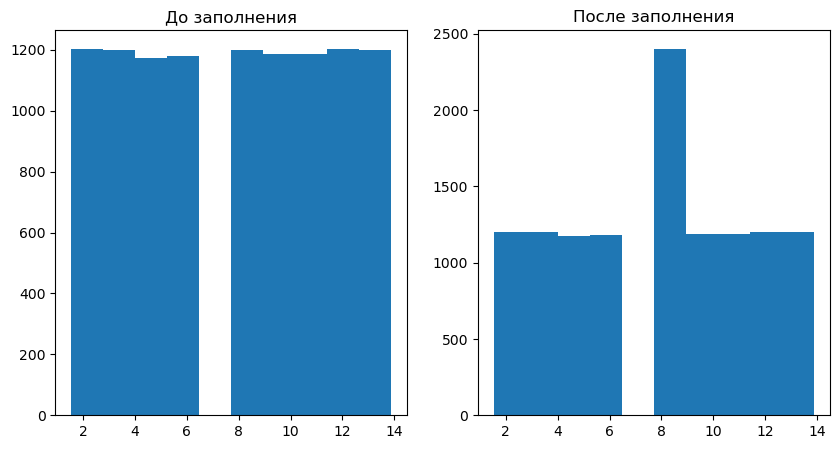

In [12]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
ax[0].hist(df['Скорость перехода через портал'])
ax[0].set_title('До заполнения')
ax[1].hist(df_mean['Скорость перехода через портал'])
ax[1].set_title('После заполнения')
plt.show()

## Вычислим дивергенцию

In [13]:
p, _ = np.histogram(df['Скорость перехода через портал'].dropna(), bins=20, density=True)
q1, _ = np.histogram(df_median['Скорость перехода через портал'], bins=20, density=True)
q2, _ = np.histogram(df_mean['Скорость перехода через портал'], bins=20, density=True)

p += 1e-12
q1 += 1e-12
q2 += 1e-12

d1 = np.sum(p * np.log(p / q1))
d2 = np.sum(p * np.log(p / q2))
print(f"Дивергенция после заполнения медианой: {d1}")
print(f"Дивергенция после заполнения средним: {d2}")

Дивергенция после заполнения медианой: 0.0463342976928194
Дивергенция после заполнения средним: 0.0463342976928194


# Машинные подходы

## IterativeImputer

In [14]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, KNNImputer

In [15]:
imp = IterativeImputer(max_iter=100, random_state=42)
imp.fit(X_train)

IterativeImputer(max_iter=100, random_state=42)

In [16]:
X_train_IterativeImputer = imp.transform(X_train)
X_test_IterativeImputer = imp.transform(X_test)

In [17]:
df_IterativeImputer = pd.concat([
    pd.DataFrame(X_train_IterativeImputer, columns=X_train.columns),
    pd.DataFrame(X_test_IterativeImputer, columns=X_train.columns)
], axis=0)

In [18]:
df_IterativeImputer.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11934 entries, 0 to 2386
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Вектор Мощи                     11934 non-null  float64
 1   Скорость перехода через портал  11934 non-null  float64
 2   Приток Силы Потока              11934 non-null  float64
 3   Ритм магического ядра           11934 non-null  float64
 4   Поток Энергий                   11934 non-null  float64
 5   Сила Левого Потока              11934 non-null  float64
 6   Сила Правого Потока             11934 non-null  float64
 7   Пламя Стихий                    11934 non-null  float64
 8   Температура вдоха Истока        11934 non-null  float64
 9   Приток давления Выдоха Истока   11934 non-null  float64
 10  Давление выдоха Истока          11934 non-null  float64
 11  Печать Чародея                  11934 non-null  float64
 12  Эмульсия Истока                 11934 

In [19]:
knn_imp = KNNImputer()
knn_imp.fit(X_train)

KNNImputer()

In [20]:
X_train_KNNImputer = knn_imp.transform(X_train)
X_test_KNNImputer = knn_imp.transform(X_test)

In [21]:
df_train_imp = pd.DataFrame(
    X_train_KNNImputer, 
    columns=X_train.columns, 
    index=X_train.index
)

df_test_imp = pd.DataFrame(
    X_test_KNNImputer, 
    columns=X_train.columns, 
    index=X_test.index 
)
df_KNNImputer = pd.concat([df_train_imp, df_test_imp], axis=0)

In [22]:
df_KNNImputer.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11934 entries, 2992 to 1492
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Вектор Мощи                     11934 non-null  float64
 1   Скорость перехода через портал  11934 non-null  float64
 2   Приток Силы Потока              11934 non-null  float64
 3   Ритм магического ядра           11934 non-null  float64
 4   Поток Энергий                   11934 non-null  float64
 5   Сила Левого Потока              11934 non-null  float64
 6   Сила Правого Потока             11934 non-null  float64
 7   Пламя Стихий                    11934 non-null  float64
 8   Температура вдоха Истока        11934 non-null  float64
 9   Приток давления Выдоха Истока   11934 non-null  float64
 10  Давление выдоха Истока          11934 non-null  float64
 11  Печать Чародея                  11934 non-null  float64
 12  Эмульсия Истока                 119

## Вычислим дивергенцию

In [23]:
p, _ = np.histogram(df['Скорость перехода через портал'].dropna(), bins=20, density=True)
q1, _ = np.histogram(df_IterativeImputer['Скорость перехода через портал'], bins=20, density=True)
q2, _ = np.histogram(df_KNNImputer['Скорость перехода через портал'], bins=20, density=True)

p += 1e-12
q1 += 1e-12
q2 += 1e-12

d1 = np.sum(p * np.log(p / q1))
d2 = np.sum(p * np.log(p / q2))
print(f"Дивергенция после IterativeImputer: {d1}")
print(f"Дивергенция после KNNImputer: {d2}")

Дивергенция после IterativeImputer: 9.719260027398146
Дивергенция после KNNImputer: 0.0007433870986386889


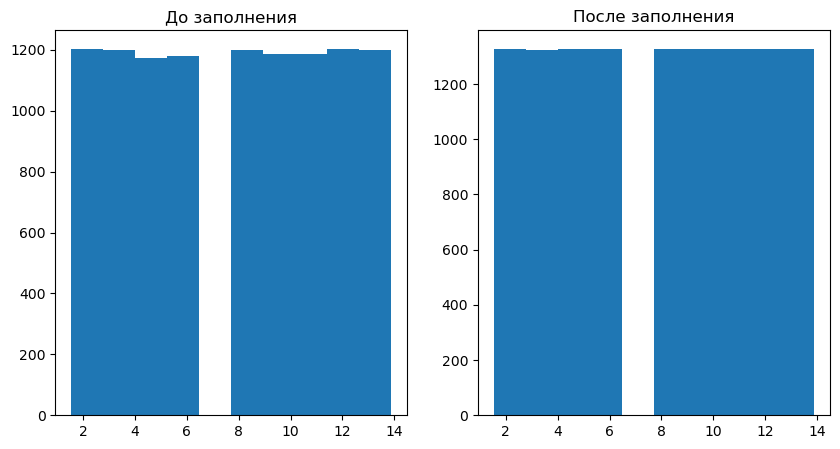

In [24]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
ax[0].hist(df['Скорость перехода через портал'])
ax[0].set_title('До заполнения')
ax[1].hist(df_KNNImputer['Скорость перехода через портал'])
ax[1].set_title('После заполнения')
plt.show()

In [25]:
df_KNNImputer.describe()

,Вектор Мощи,Скорость перехода через портал,Приток Силы Потока,Ритм магического ядра,Поток Энергий,Сила Левого Потока,Сила Правого Потока,Пламя Стихий,Температура вдоха Истока,Приток давления Выдоха Истока,Давление выдоха Истока,Печать Чародея,Эмульсия Истока,Дыхание Истока,Тип Вектора Мощи
count,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.0,11934.000000,11934.000000,11934.000000,11934.000000,11934.00000,11934.000000
mean,5.166667,7.716678,27247.498685,223.711688,8200.947312,227.335768,227.335768,735.495446,736.0,2.352963,12.297123,33.641261,0.662440,0.97500,2.666667
std,2.626388,3.984835,22148.613155,81.061874,1091.315507,200.495889,200.495889,173.680552,0.0,1.084770,5.337448,25.841363,0.507132,0.01472,1.154749
min,1.138000,1.543320,253.547000,136.939406,6589.002000,5.304000,5.304000,442.364000,736.0,1.093000,5.828000,0.000000,0.068000,0.95000,1.000000
25%,3.144000,4.629960,8375.883750,145.220958,7058.324000,60.317000,60.317000,589.872750,736.0,1.389000,7.447250,13.677500,0.246000,0.96200,2.000000
50%,5.140000,7.716600,21630.659000,201.514947,8482.081500,175.268000,175.268000,706.038000,736.0,2.083000,11.092000,25.276500,0.496000,0.97500,3.000000
75%,7.148000,10.803240,39001.426750,280.447777,9132.606000,332.364750,332.364750,834.066250,736.0,2.981000,15.658000,44.552500,0.882000,0.98800,4.000000
max,9.300000,13.889880,72784.872000,372.879926,9797.103000,645.249000,645.249000,1115.797000,736.0,4.560000,23.140000,92.556000,1.832000,1.00000,4.000000


In [26]:
df_compute = pd.concat((df_KNNImputer, y), axis=1)

In [27]:
df_compute.head()

,Вектор Мощи,Скорость перехода через портал,Приток Силы Потока,Ритм магического ядра,Поток Энергий,Сила Левого Потока,Сила Правого Потока,Пламя Стихий,Температура вдоха Истока,Приток давления Выдоха Истока,Давление выдоха Истока,Печать Чародея,Эмульсия Истока,Дыхание Истока,Тип Вектора Мощи,Гармония Бессмертия
2992,5.140,7.71660,21636.019,201.516728,8501.313,175.299,175.299,705.599,736.0,2.077,10.988,24.967,0.494,0.962,3.0,0.995
7193,3.144,4.62996,8377.498,145.219911,7092.180,60.337,60.337,577.042,736.0,1.390,7.450,11.942,0.236,0.980,2.0,0.994
3098,3.144,4.62996,8378.222,145.220330,7097.374,60.341,60.341,595.018,736.0,1.390,7.536,12.660,0.251,0.963,2.0,0.981
11533,5.140,7.71660,21621.936,201.513691,8454.950,175.226,175.226,698.997,736.0,2.092,11.191,24.816,0.491,0.999,3.0,0.982
4876,8.206,12.34656,50993.998,323.323396,9314.902,438.071,438.071,916.782,736.0,3.573,18.263,59.619,1.180,0.970,4.0,0.996


In [28]:
import pickle
with open(r'../../data/pract_dataset_lab3.pkl', 'wb') as f:
    pickle.dump(df_compute, f)

In [29]:
X_train.describe()

,Вектор Мощи,Скорость перехода через портал,Приток Силы Потока,Ритм магического ядра,Поток Энергий,Сила Левого Потока,Сила Правого Потока,Пламя Стихий,Температура вдоха Истока,Приток давления Выдоха Истока,Давление выдоха Истока,Печать Чародея,Эмульсия Истока,Дыхание Истока,Тип Вектора Мощи
count,9547.000000,8579.000000,9547.000000,9547.000000,9547.000000,9547.000000,9547.000000,9547.000000,9547.0,9547.000000,9547.000000,9547.000000,9547.000000,9547.000000,9547.000000
mean,5.170213,7.725235,27313.675170,223.933396,8200.072719,227.923089,227.923089,736.000361,736.0,2.356197,12.312725,33.717488,0.664293,0.975082,2.666597
std,2.634142,4.002254,22233.188113,81.366304,1094.712877,201.292706,201.292706,174.175378,0.0,1.088986,5.357963,25.952585,0.509012,0.014692,1.158314
min,1.138000,1.543320,253.547000,136.939406,6589.002000,5.304000,5.304000,442.364000,736.0,1.093000,5.828000,0.000000,0.068000,0.950000,1.000000
25%,3.144000,4.629960,8375.799500,145.220958,7056.822500,60.317000,60.317000,589.986500,736.0,1.389000,7.445500,13.152500,0.246000,0.962000,2.000000
50%,5.140000,7.716600,21630.637000,201.514947,8482.088000,175.268000,175.268000,706.086000,736.0,2.083000,11.094000,25.282000,0.496000,0.975000,3.000000
75%,7.148000,10.803240,39002.602500,280.447882,9133.413500,332.374000,332.374000,835.140000,736.0,2.982000,15.671500,44.637500,0.884000,0.988000,4.000000
max,9.300000,13.889880,72784.872000,372.879926,9797.103000,645.249000,645.249000,1115.797000,736.0,4.560000,23.140000,92.556000,1.832000,1.000000,4.000000
